<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase5_ANN(new_data_2023_06_03)_6_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

cv = LeaveOneOut()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/

Mounted at /content/drive
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction


In [ ]:
import os
directory = 'path'
for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Print the file name
        print(filename)

AAO_msl_Reanalysis.txt
EMI_Reanalysis.txt
GMT_Reanalysis.txt
NINO3_Reanalysis.txt
NINO4_Reanalysis.txt
NINO34_Reanalysis.txt
PDO_Reanalysis.txt
PNA_Reanalysis.txt
QBO_Reanalysis.txt
AMO_Reanalysis.txt
AO_msl_Reanalysis.txt


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory = 'path'

df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data = []
      for line in lines:
          year = int(line[0])
          values = [float(x) for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data.append(row_dict)
    # create the DataFrame
      df = pd.DataFrame(data)
      df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df = df.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
      df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
rawdata_df = pd.concat(df_list, ignore_index=True)

# Group by year and month and aggregate values
rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

# Fill missing values with 0 if needed
# rawdata_df = rawdata_df.fillna(0)

rawdata_df

,year,month,AAO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis
0,1854,1,NaN,-0.316023,NaN,0.065001,-0.392995,-0.435995,0.106996,NaN,NaN,1.408989,NaN
1,1854,2,NaN,0.539980,NaN,-0.033000,0.003005,-0.441995,0.061996,NaN,NaN,2.092984,NaN
2,1854,3,NaN,0.978981,NaN,-0.086000,0.412004,0.017005,0.234996,NaN,NaN,1.578988,NaN
3,1854,4,NaN,0.931981,NaN,0.074001,0.471004,0.354005,0.155996,NaN,NaN,1.139991,NaN
4,1854,5,NaN,0.583980,NaN,0.210002,0.681004,0.479005,-0.220005,NaN,NaN,0.234998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2021,8,-0.266012,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,1.033992,0.104003
2012,2021,9,-1.470005,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,1.534988,-0.612989
2013,2021,10,-0.038013,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,1.637987,-0.526990
2014,2021,11,-1.382006,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,1.619988,-0.065995


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory2 = 'country'

df2_list = []

# Loop through all files in the directory2
for filename in os.listdir(directory2):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory2, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data2 = []
      for line in lines:
          year = int(line[0])
          values = [float(x) if x != '-9' else 0 for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data2.append(row_dict)
    # create the DataFrame
      df2 = pd.DataFrame(data2)
      df2 = df2.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df2 = df2.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      #df2[column_name] = scaler.fit_transform(df2[column_name].values.reshape(-1, 1))
      df2_list.append(df2)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(df2_list, ignore_index=True)

# Group by year and month and aggregate values
result_df = result_df.groupby(['year', 'month']).mean().reset_index()

result_df = result_df.rename(columns={'Mexico_TC_freq_NHC-ENP': 'Mexic2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'Mexico_TC_landfall_intensity_NHC-ENP': 'Mexic2_TC_landfall_intensity_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_freq_NHC-ENP': 'U2_TC_freq_NHC-ENP'})
result_df = result_df.rename(columns={'US_TC_landfall_intensity_NHC-ENP': 'U2_TC_landfall_intensity_NHC-ENP'})
result_df.columns = map(str.lower, result_df.columns)
# Fill missing values with 0 if neederesult# merged_df2 = merged_df2.fillna(0)
pd.options.display.max_columns = None
result_df

,year,month,korea_tc_freq_jtwc-wnp,japan_tc_freq_jtwc-wnp,korea_tc_landfall_intensity_jtwc-wnp,japan_tc_landfall_intensity_jtwc-wnp,taiwan_tc_freq_jtwc-wnp,taiwan_tc_landfall_intensity_jtwc-wnp,china_tc_freq_jtwc-wnp,china_tc_landfall_intensity_jtwc-wnp,vietnam_tc_freq_jtwc-wnp,vietnam_tc_landfall_intensity_jtwc-wnp,phili_tc_freq_jtwc-wnp,phili_tc_landfall_intensity_jtwc-wnp,u2_tc_freq_nhc-enp,u2_tc_landfall_intensity_nhc-enp,mexic2_tc_freq_nhc-enp,mexic2_tc_landfall_intensity_nhc-enp,us_tc_freq_nhc-nat,us_tc_landfall_intensity_nhc-nat,mexico_tc_freq_nhc-nat,mexico_tc_landfall_intensity_nhc-nat,carribean_tc_freq_nhc-nat,carribean_tc_landfall_intensity_nhc-nat,sri_tc_freq_jtwc-nio,sri_tc_landfall_intensity_jtwc-nio,india_tc_freq_jtwc-nio,india_tc_landfall_intensity_jtwc-nio,pakistan_tc_freq_jtwc-nio,pakistan_tc_landfall_intensity_jtwc-nio,bangla_tc_freq_jtwc-nio,bangla_tc_landfall_intensity_jtwc-nio,myanmar_tc_freq_jtwc-nio,myanmar_tc_landfall_intensity_jtwc-nio,madagascar_tc_freq_jtwc-sh,madagascar_tc_landfall_intensity_jtwc-sh,austrailia_tc_freq_jtwc-sh,austrailia_tc_landfall_intensity_jtwc-sh
0,1959,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1959,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1959,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,1.0,25.0,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021,8,1.0,4.0,26.0,32.0,1.0,45.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.0,3.0,64.0,1.0,70.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752,2021,9,1.0,1.0,55.0,42.0,1.0,148.0,1.0,105.0,2.0,36.0,2.0,78.0,0.0,0.0,1.0,25.0,3.0,35.0,1.0,35.0,1.0,39.0,0.0,0.0,1.0,40.0,1.0,25.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0
753,2021,10,0.0,1.0,0.0,78.0,0.0,0.0,2.0,42.0,2.0,36.0,1.0,48.0,0.0,0.0,2.0,67.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,2021,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_titles = list(result_df.columns)
column_titles.remove('year')
column_titles.remove('month')
column_titles.sort()
column_titles

['austrailia_tc_freq_jtwc-sh',
 'austrailia_tc_landfall_intensity_jtwc-sh',
 'bangla_tc_freq_jtwc-nio',
 'bangla_tc_landfall_intensity_jtwc-nio',
 'carribean_tc_freq_nhc-nat',
 'carribean_tc_landfall_intensity_nhc-nat',
 'china_tc_freq_jtwc-wnp',
 'china_tc_landfall_intensity_jtwc-wnp',
 'india_tc_freq_jtwc-nio',
 'india_tc_landfall_intensity_jtwc-nio',
 'japan_tc_freq_jtwc-wnp',
 'japan_tc_landfall_intensity_jtwc-wnp',
 'korea_tc_freq_jtwc-wnp',
 'korea_tc_landfall_intensity_jtwc-wnp',
 'madagascar_tc_freq_jtwc-sh',
 'madagascar_tc_landfall_intensity_jtwc-sh',
 'mexic2_tc_freq_nhc-enp',
 'mexic2_tc_landfall_intensity_nhc-enp',
 'mexico_tc_freq_nhc-nat',
 'mexico_tc_landfall_intensity_nhc-nat',
 'myanmar_tc_freq_jtwc-nio',
 'myanmar_tc_landfall_intensity_jtwc-nio',
 'pakistan_tc_freq_jtwc-nio',
 'pakistan_tc_landfall_intensity_jtwc-nio',
 'phili_tc_freq_jtwc-wnp',
 'phili_tc_landfall_intensity_jtwc-wnp',
 'sri_tc_freq_jtwc-nio',
 'sri_tc_landfall_intensity_jtwc-nio',
 'taiwan_tc_freq_j

In [ ]:
country_codes = {
    'austrailia': 0,
    'bangla': 1,
    'carribean': 2,
    'china': 3,
    'india': 4,
    'japan': 5,
    'korea': 6,
    'madagascar': 7,
    'mexic2': 8,
    'mexico': 9,
    'myanmar': 10,
    'phili': 11,
    'pakistan': 12,
    'sri': 13,
    'taiwan': 14,
    'u2': 15,
    'us': 16,
    'vietnam': 17,
}


In [ ]:
result_dfs = []

for col in column_titles:

    for key in country_codes.keys():
        if key in col.lower():
            country = country_codes[key]
            break
    else:
        country = None

    # Add the 'country' column to result_df
    result_df['country'] = country
    result_df['name'] = key

    # Check if the selected column name contains 'freq' or 'intensity', and replace the entire column name with either 'freq' or 'intensity' accordingly
    if 'freq' in col.lower():
        new_column_name = 'freq'
    elif 'intensity' in col.lower():
        new_column_name = 'intensity'
    else:
        new_column_name = col

    # Get the years without nan values for the selected country
    years = result_df[result_df[col].notna()]['year'].unique()

    # Filter dataframe A for the selected country and years
    x = rawdata_df[rawdata_df['year'].isin(years)]

    # Filter dataframe B for the selected country and years, and rename the selected column
    y = result_df[['year', 'month', 'country', 'name', col]][result_df[col].notna() & result_df['year'].isin(years)].rename(columns={col: new_column_name})

    xy = pd.merge(x, y, on=['year', 'month'])
    result_dfs.append(xy)

alldfs = pd.concat(result_dfs, ignore_index=True)
alldfs


# one-hot encoding using pandas.get_dummies() method
one_hot = pd.get_dummies(alldfs['country'])

# concatenate the one-hot encoded dataframe with the original dataframe
alldfs = pd.concat([alldfs, one_hot], axis=1)

# drop the original 'country' column
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('freq')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('intensity')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('country')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('name')))
alldfs = alldfs[cols]
alldfs

,year,month,AAO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,intensity,country,name
0,1991,1,-1.248007,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,-1.573988,0.694996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
1,1991,2,0.845982,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,-1.286990,-0.228994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,0,austrailia
2,1991,3,-0.501011,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,-1.333990,-0.238993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
3,1991,4,0.513984,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,-1.966985,1.088992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
4,1991,5,0.017987,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,-2.141983,0.525998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,2021,8,-0.266012,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,1.033992,0.104003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,17,vietnam
24236,2021,9,-1.470005,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,1.534988,-0.612989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,36.0,17,vietnam
24237,2021,10,-0.038013,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,1.637987,-0.526990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,36.0,17,vietnam
24238,2021,11,-1.382006,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,1.619988,-0.065995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,17,vietnam


In [ ]:
freqdf = alldfs.drop(columns=['intensity'])
freqdf = freqdf.dropna().reset_index(drop=True)
freqdf

,year,month,AAO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,country,name
0,1991,1,-1.248007,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,-1.573988,0.694996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1991,2,0.845982,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,-1.286990,-0.228994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,austrailia
2,1991,3,-0.501011,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,-1.333990,-0.238993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1991,4,0.513984,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,-1.966985,1.088992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1991,5,0.017987,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,-2.141983,0.525998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2021,8,-0.266012,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,1.033992,0.104003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam
12116,2021,9,-1.470005,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,1.534988,-0.612989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,17,vietnam
12117,2021,10,-0.038013,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,1.637987,-0.526990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,17,vietnam
12118,2021,11,-1.382006,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,1.619988,-0.065995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam


In [ ]:
intendf = alldfs.drop(columns=['freq'])
intendf = intendf.dropna().reset_index(drop=True)
intendf

,year,month,AAO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO3_Reanalysis,NINO4_Reanalysis,NINO34_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,intensity,country,name
0,1991,1,-1.248007,2.039985,0.332999,0.103001,1.192004,0.604005,-1.199005,-0.476996,0.925998,-1.573988,0.694996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1991,2,0.845982,2.012985,0.499999,-0.032000,1.147004,0.453005,-0.586005,0.891000,0.949998,-1.286990,-0.228994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,austrailia
2,1991,3,-0.501011,1.540983,-0.041000,-0.144001,0.825004,0.155005,-0.451005,-1.266993,0.837999,-1.333990,-0.238993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1991,4,0.513984,1.340983,0.377999,0.096001,0.870004,0.423005,-0.950005,0.417001,0.329001,-1.966985,1.088992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1991,5,0.017987,1.418983,0.132000,0.422004,1.003004,0.467005,-0.984005,-0.209997,-0.295996,-2.141983,0.525998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2021,8,-0.266012,-0.524024,1.668996,-0.616004,-0.267995,-0.631995,-0.385005,-0.080997,-0.619995,1.033992,0.104003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam
12116,2021,9,-1.470005,-0.654025,1.932995,-0.651005,-0.783994,-0.702995,-1.249005,-0.039997,-0.827994,1.534988,-0.612989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.0,17,vietnam
12117,2021,10,-0.038013,-0.840025,2.070995,-0.988007,-1.073994,-1.079994,-2.306006,-0.392996,-1.027993,1.637987,-0.526990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.0,17,vietnam
12118,2021,11,-1.382006,-0.670025,1.916995,-1.338010,-1.081994,-1.160994,-2.050005,0.852000,-1.167992,1.619988,-0.065995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,17,vietnam


In [ ]:
# ANN Leavoneyearout O
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=30, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
# 3,5,6,15,16,11,14
freqdf = freqdf[~freqdf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)

#freqdf = freqdf[freqdf['country'] == 13].reset_index(drop=True)
#intendf = intendf[intendf['country'] == 13].reset_index(drop=True)

# Loop over each year and perform LOOCV
for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    freqdf_x1_train = freqdf[freqdf['year'] != year].iloc[:,1:31]
    freqdf_x1_test = freqdf[freqdf['year'] == year].iloc[:,1:31]
    freqdf_y1_train = freqdf[freqdf['year'] != year].iloc[:,[0, 1, 33, 31]]
    freqdf_y1_test = freqdf[freqdf['year'] == year].iloc[:,[0, 1, 33, 31]]

    # Train the model on the training set
    model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y1_pred = model_1.predict(freqdf_x1_test)

    # Add the predictions and actual values to the respective lists
    y1_preds.extend(y1_pred)
    y1_actuals.extend(freqdf_y1_test.iloc[:,3].values)
    y1_test_year.extend(freqdf_y1_test.iloc[:,0].values)
    y1_test_month.extend(freqdf_y1_test.iloc[:,1].values)
    y1_test_country.extend(freqdf_y1_test.iloc[:,2].values)


# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": y1_test_year, "month": y1_test_month, "country": y1_test_country, "y1_pred": np.squeeze(y1_preds),"y1_actual": y1_actuals})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq_20230603.csv', index=False)

import pickle

# 모델 저장
with open('model_freq_20230603.pkl', 'wb') as f:
    pickle.dump(model_1, f)

3/3 [==============================] - 0s 3ms/step


KeyboardInterrupt: ignored

In [ ]:
# ANN leaveoneyearout X

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=30, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
freqdf = freqdf[~freqdf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
freqdf_x1_train = freqdf.iloc[:,1:31]
freqdf_x1_test = freqdf.iloc[:,1:31]
freqdf_y1_train = freqdf.iloc[:,[0, 1, 33, 31]]
freqdf_y1_test = freqdf.iloc[:,[0, 1, 33, 31]]

# Train the model on the entire training set
model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

# Predict the output for the test set
y1_pred = model_1.predict(freqdf_x1_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": freqdf_y1_test.iloc[:,0].values, "month": freqdf_y1_test.iloc[:,1].values, "country": freqdf_y1_test.iloc[:,2].values, "y1_pred": np.squeeze(y1_pred),"y1_actual": freqdf_y1_test.iloc[:,3].values})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq_20230612.csv', index=False)

import pickle

#Save
with open('model_freq_20230612.pkl', 'wb') as f:
    pickle.dump(model_1, f)


142/142 [==============================] - 0s 1ms/step


RMSE for y1: 1.617536470534248
Correlation for y1: 0.7899212961387153


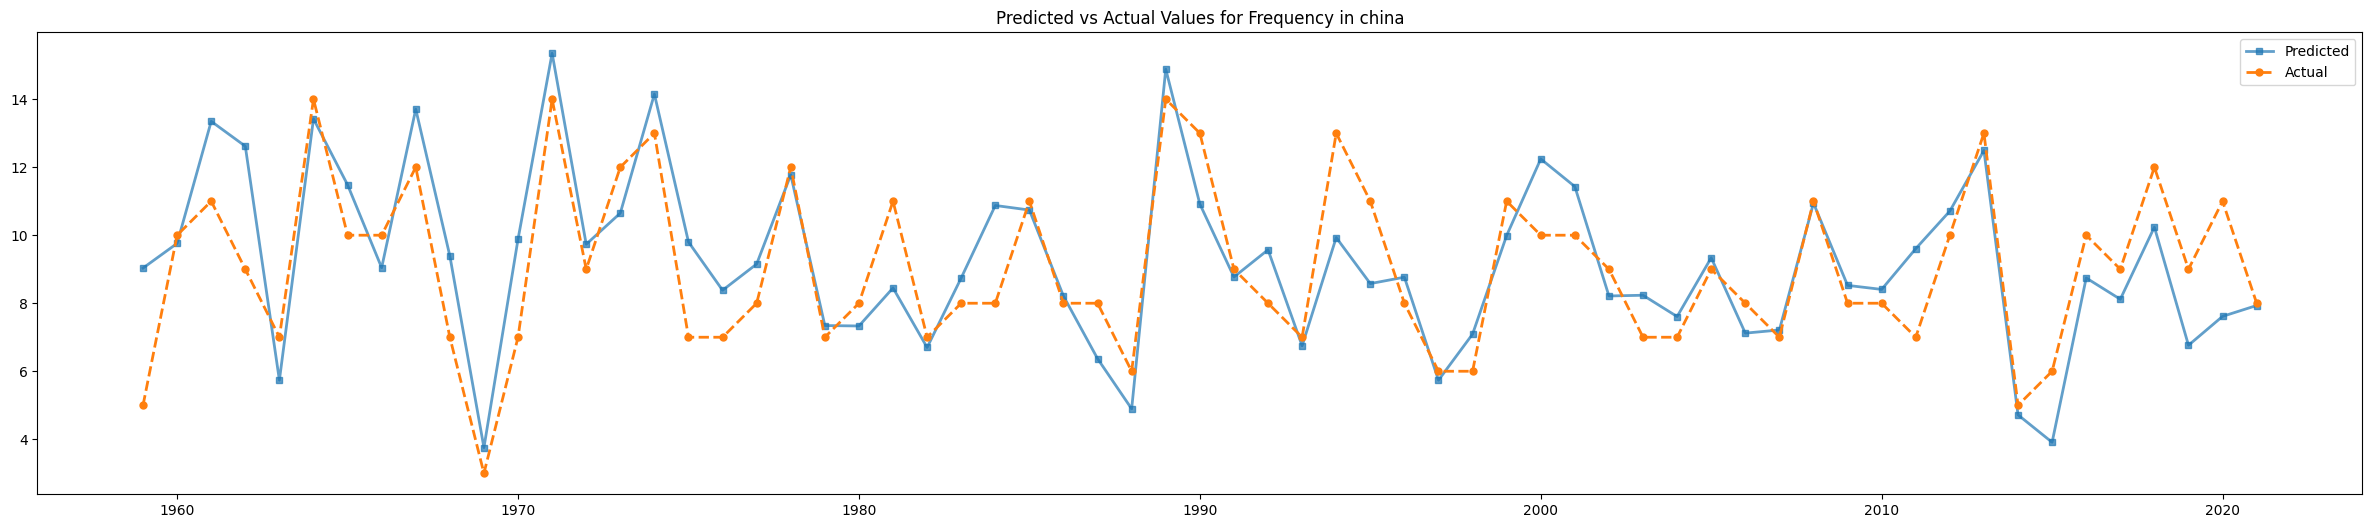

RMSE for y1: 1.4641486289989076
Correlation for y1: 0.7235546842031786


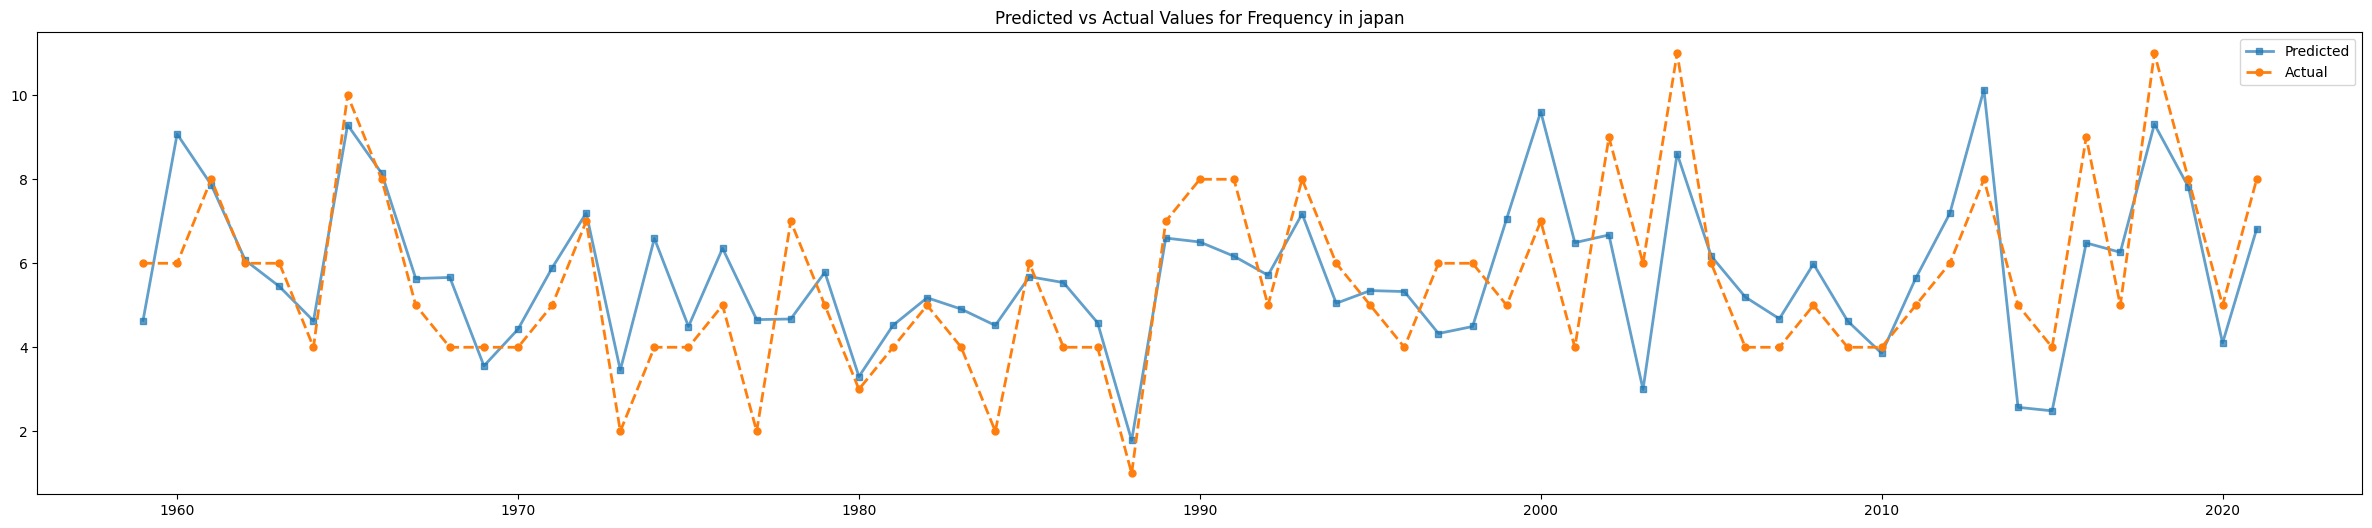

RMSE for y1: 1.3228275165353753
Correlation for y1: 0.5875621901540823


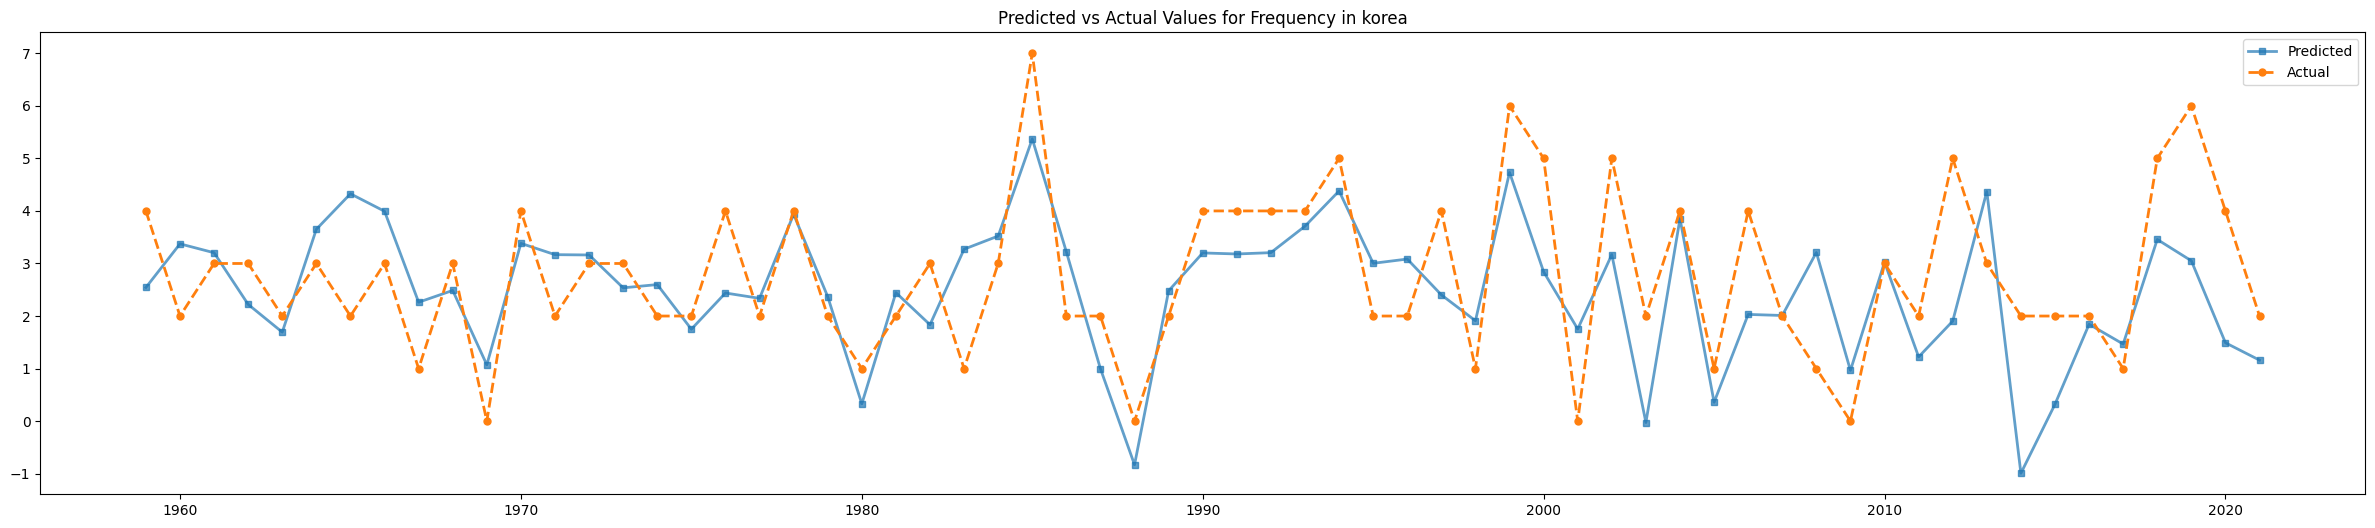

RMSE for y1: 2.091933699800893
Correlation for y1: 0.7646059641928455


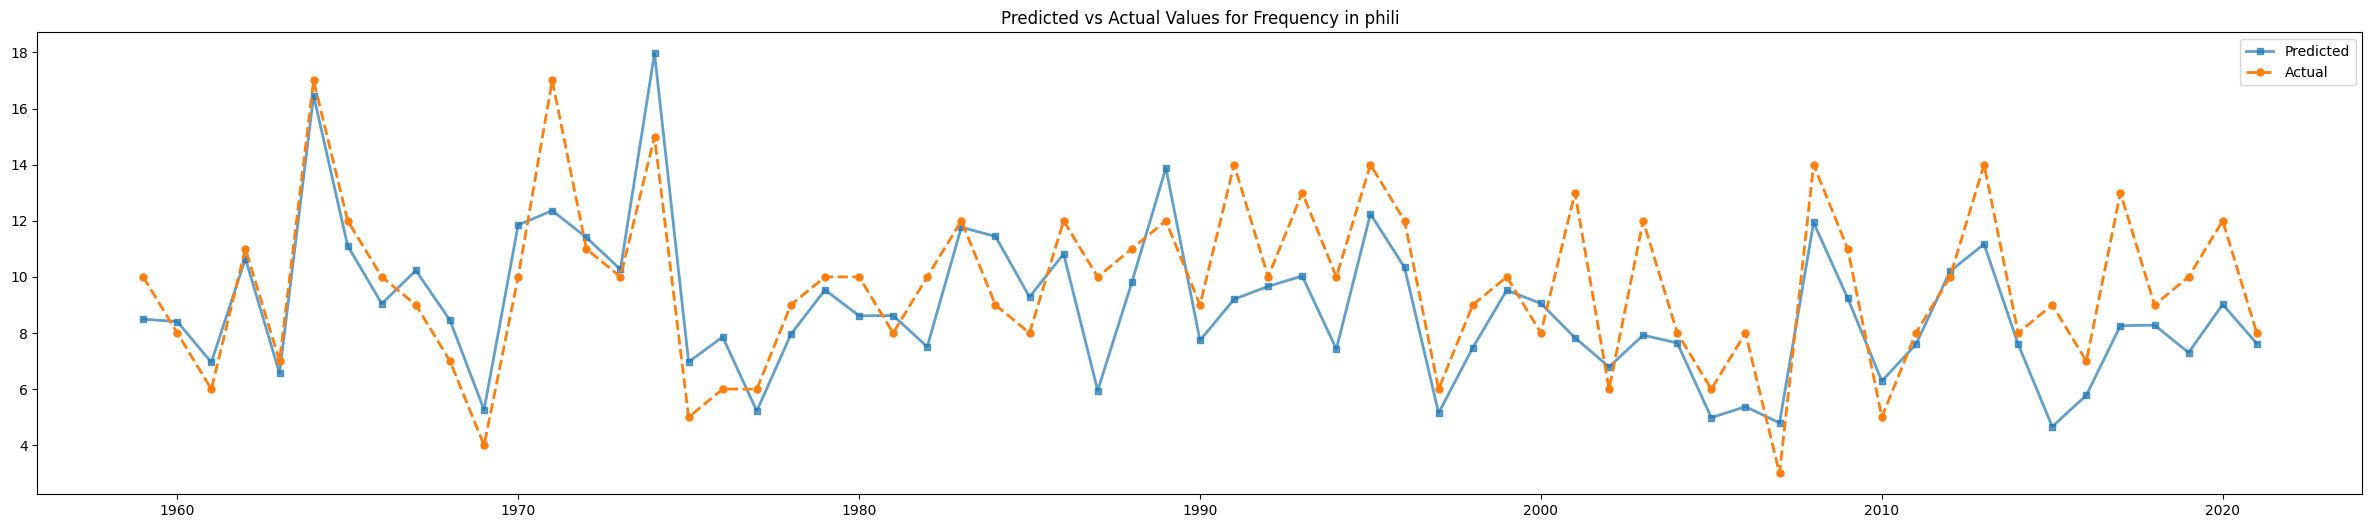

RMSE for y1: 1.4035724877701257
Correlation for y1: 0.6837691155529225


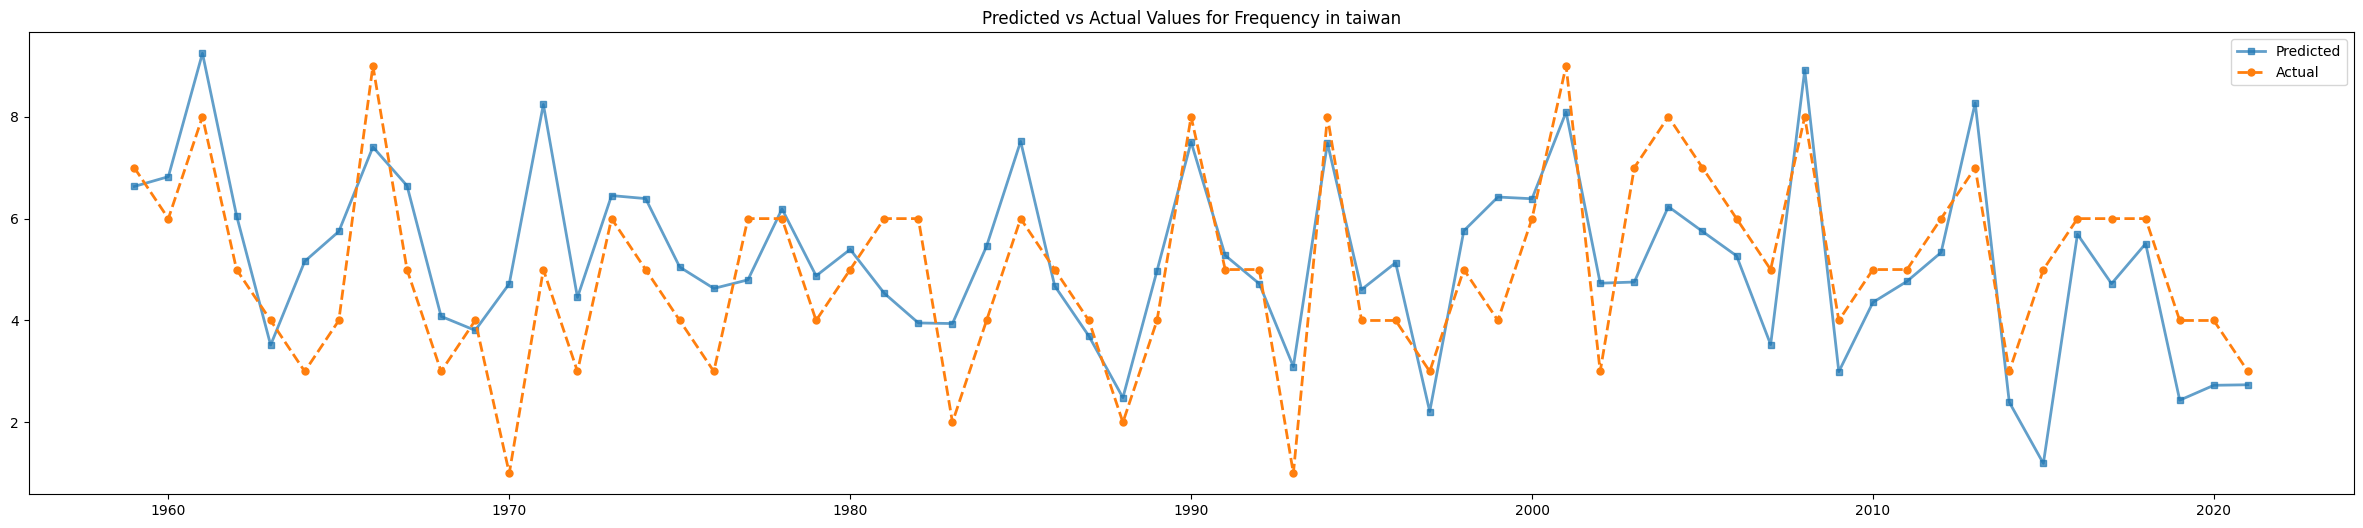

RMSE for y1: 1.7827180838955448
Correlation for y1: 0.7300302921986792


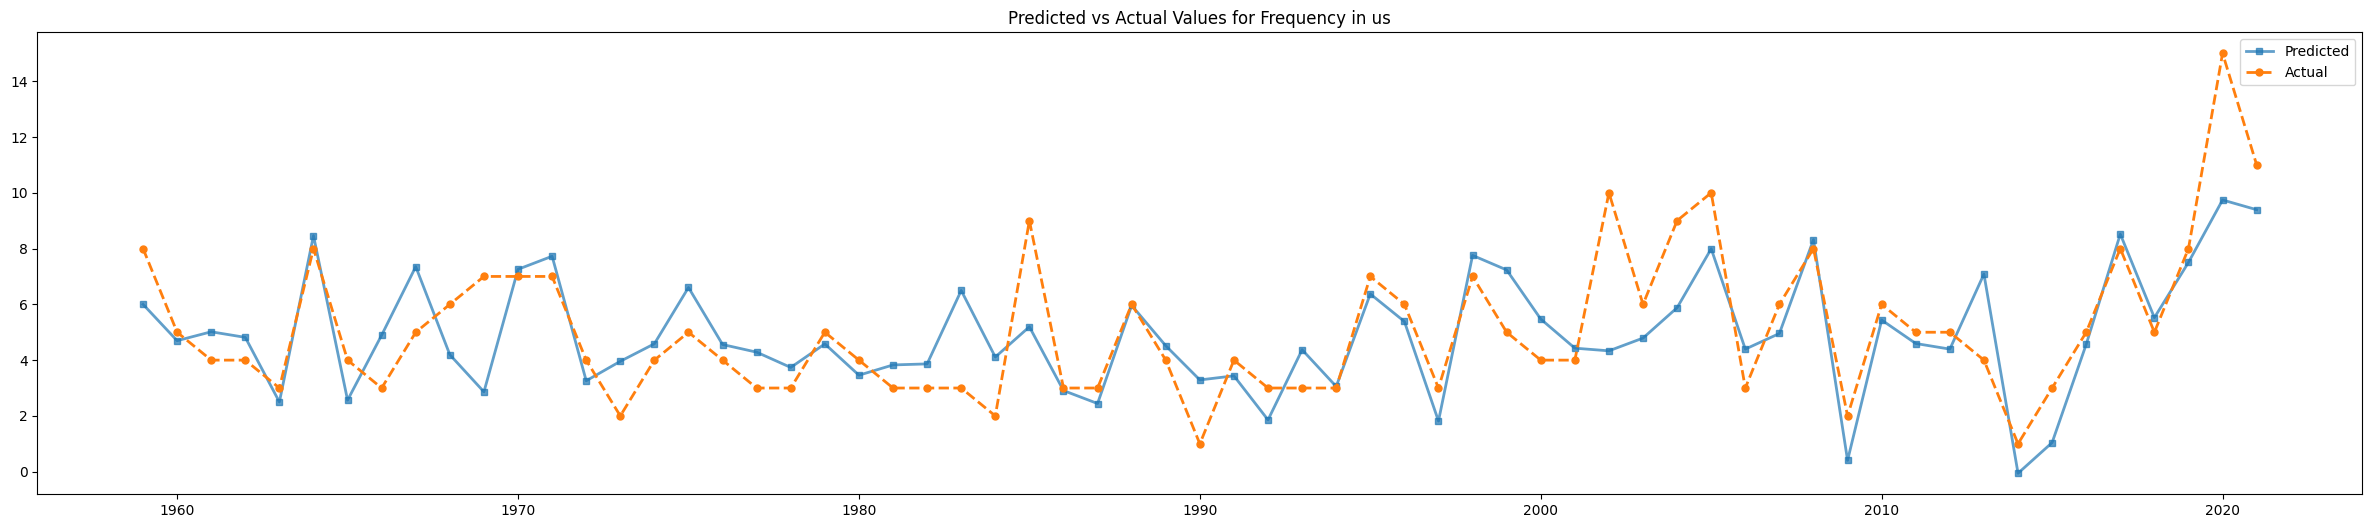

In [ ]:

# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq_20230612.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()

In [ ]:
# ANN Leavoneyearout O
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []


# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Loop over each year and perform LOOCV

for year in range(1959, 2022):
    # Split the data into training and test sets based on the year
    intendf_x2_train = intendf[intendf['year'] != year].iloc[:,1:31]
    intendf_x2_test = intendf[intendf['year'] == year].iloc[:,1:31]
    intendf_y2_train = intendf[intendf['year'] != year].iloc[:,[0, 1, 33, 31]]
    intendf_y2_test = intendf[intendf['year'] == year].iloc[:,[0, 1, 33, 31]]

    # Train the model on the training set
    model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

    # Predict the output for the test set
    y2_pred = model_2.predict(intendf_x2_test)

    # Add the predictions and actual values to the respective lists
    y2_preds.extend(y2_pred)
    y2_actuals.extend(intendf_y2_test.iloc[:,3].values)
    y2_test_year.extend(intendf_y2_test.iloc[:,0].values)
    y2_test_month.extend(intendf_y2_test.iloc[:,1].values)
    y2_test_country.extend(intendf_y2_test.iloc[:,2].values)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": y2_test_year, "month": y2_test_month, "country": y2_test_country, "y2_pred": np.squeeze(y2_preds),"y2_actual": y2_actuals})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten_20230603.csv', index=False)

import pickle

# 모델 저장
with open('model_inten_20230612.pkl', 'wb') as f:
    pickle.dump(model_2, f)


In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
intendf_x2_train = intendf.iloc[:,1:31]
intendf_x2_test = intendf.iloc[:,1:31]
intendf_y2_train = intendf.iloc[:,[0, 1, 33, 31]]
intendf_y2_test = intendf.iloc[:,[0, 1, 33, 31]]

# Train the model on the entire training set
model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=32, verbose=0)

# Predict the output for the test set
y2_pred = model_2.predict(intendf_x2_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": intendf_y2_test.iloc[:,0].values, "month": intendf_y2_test.iloc[:,1].values, "country": intendf_y2_test.iloc[:,2].values, "y2_pred": np.squeeze(y2_pred),"y2_actual": intendf_y2_test.iloc[:,3].values})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten_20230612.csv', index=False)

import pickle

# 모델 저장
with open('model_inten_20230612.pkl', 'wb') as f:
    pickle.dump(model_2, f)


142/142 [==============================] - 0s 2ms/step


RMSE for y2: 5.444993535754649
Correlation for y2: 0.6140685728955149


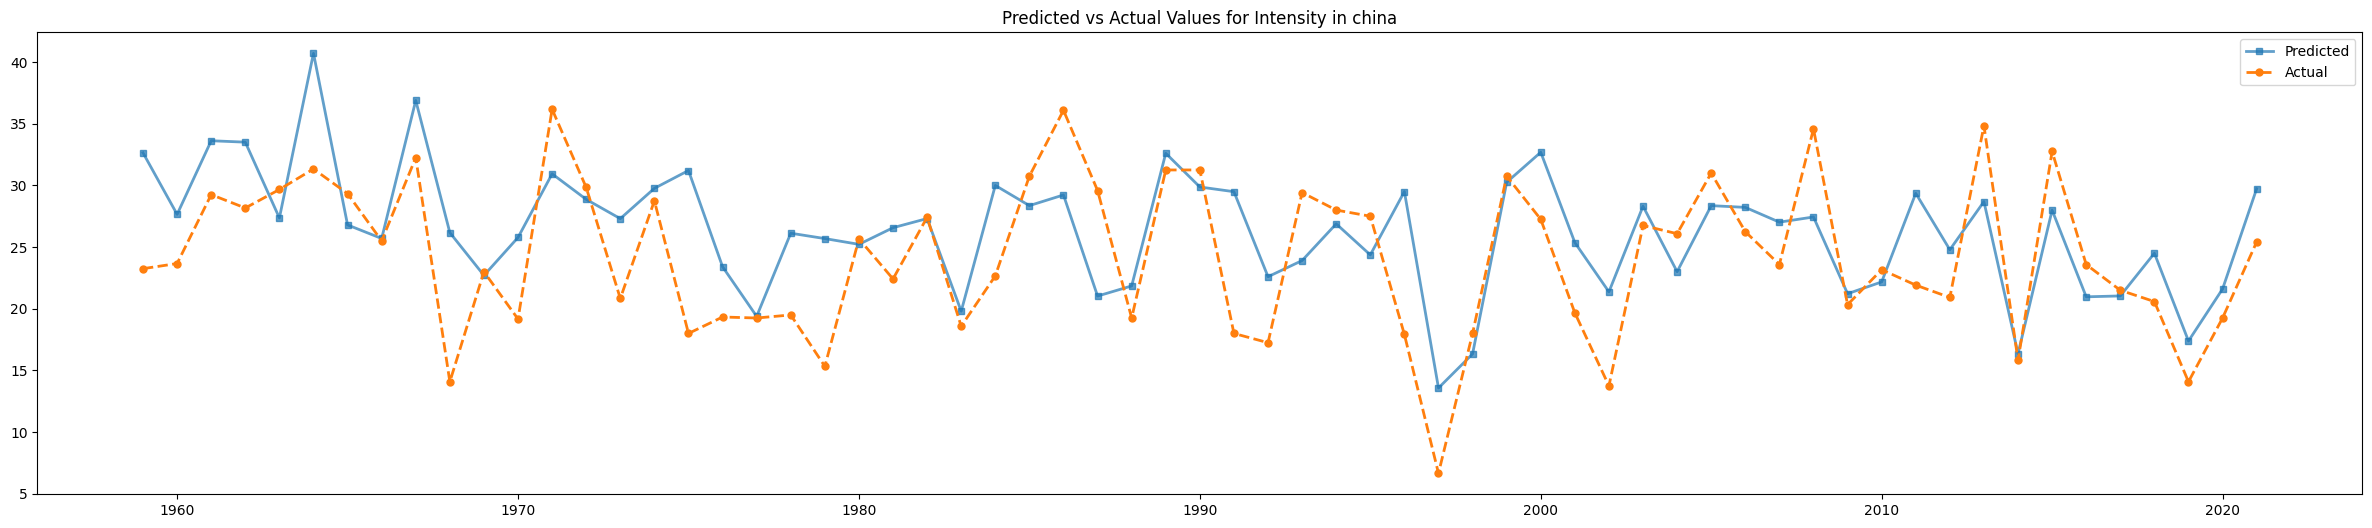

RMSE for y2: 4.740040186303865
Correlation for y2: 0.6910251619842928


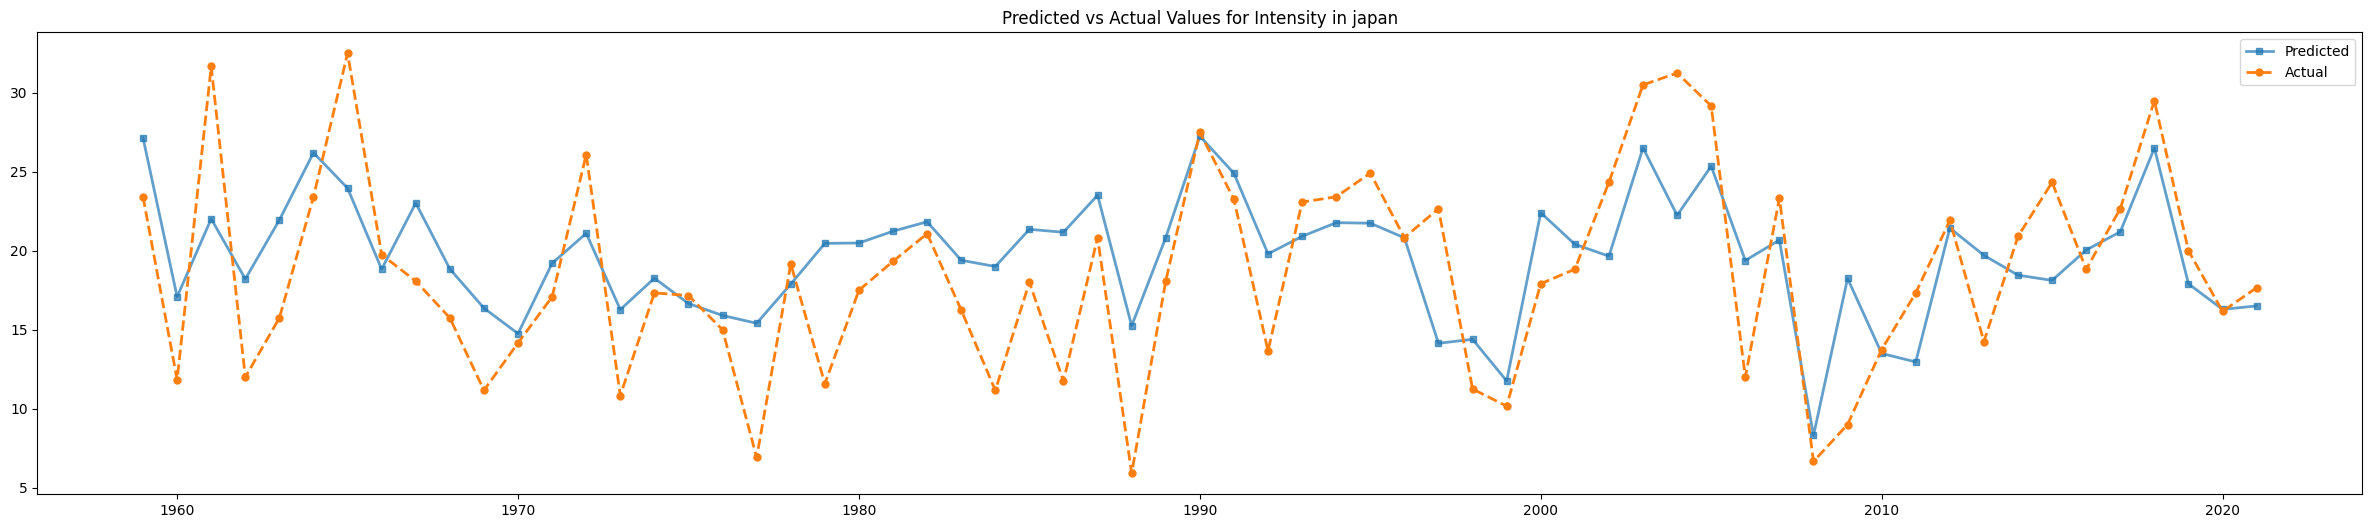

RMSE for y2: 4.536423601647023
Correlation for y2: 0.47191992257442766


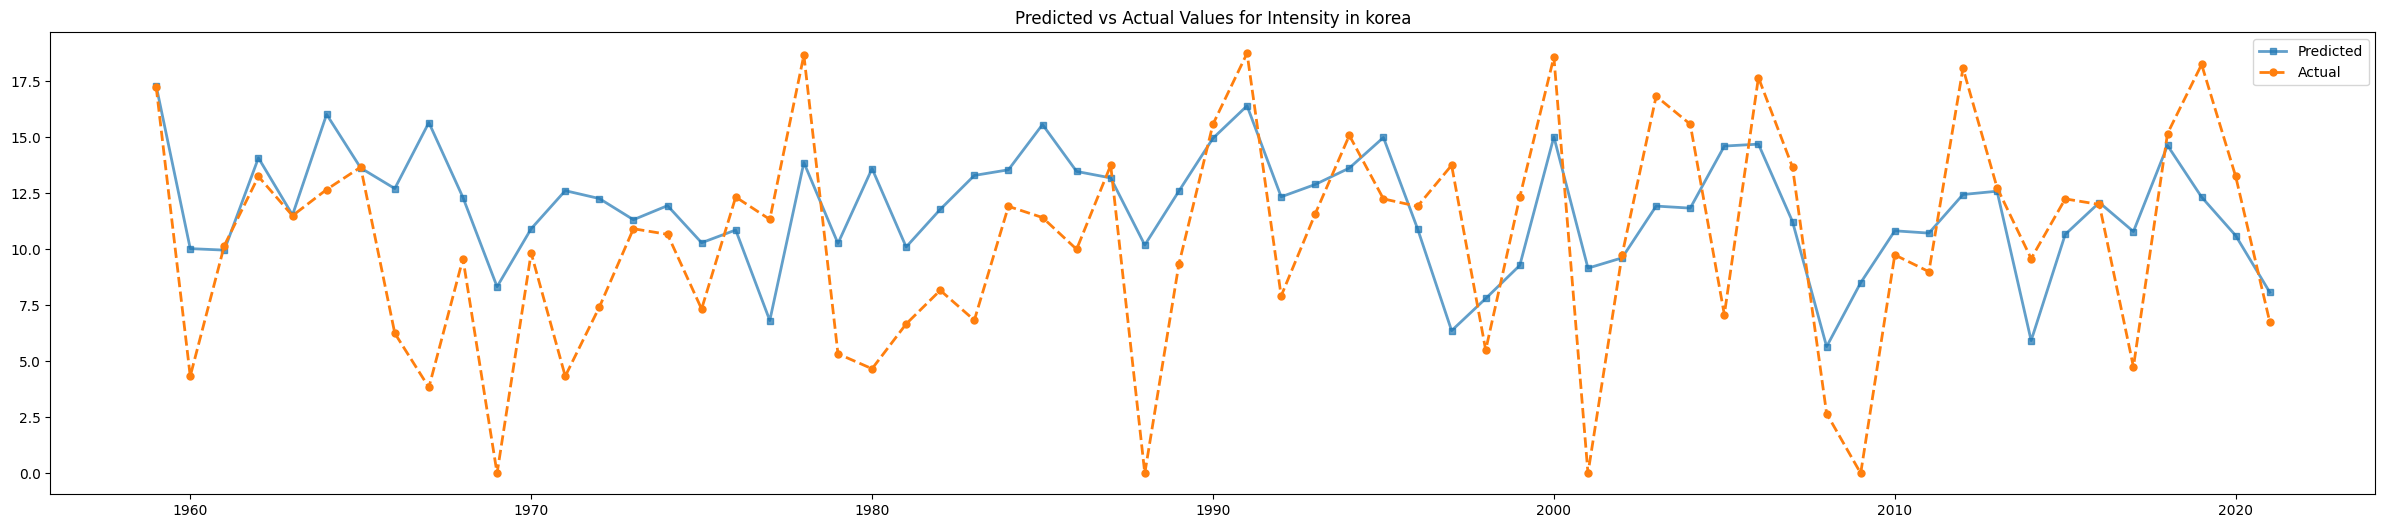

RMSE for y2: 7.596394268317241
Correlation for y2: 0.5658675890906365


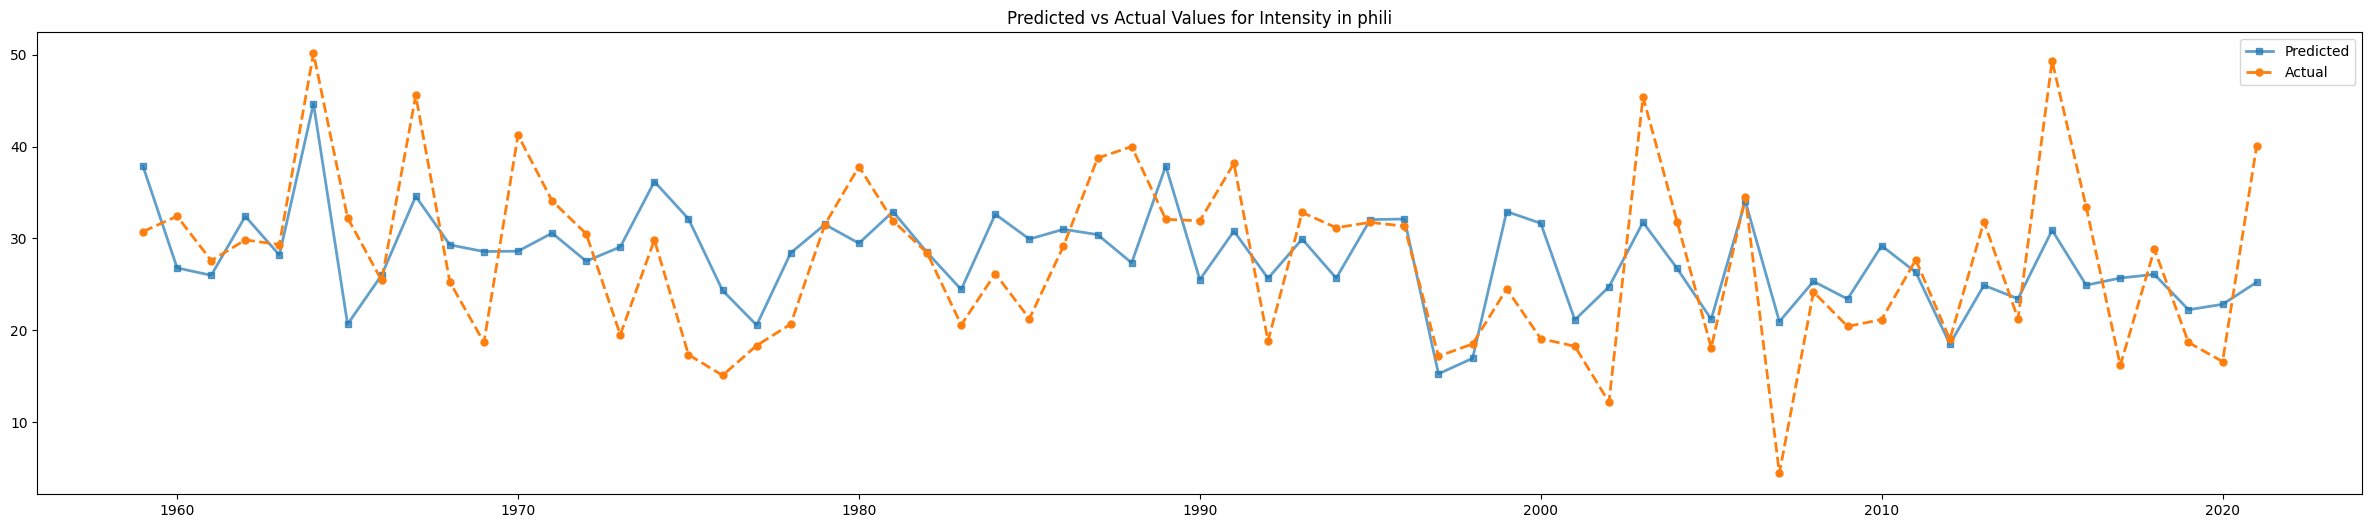

RMSE for y2: 6.423389111486253
Correlation for y2: 0.6226353599685168


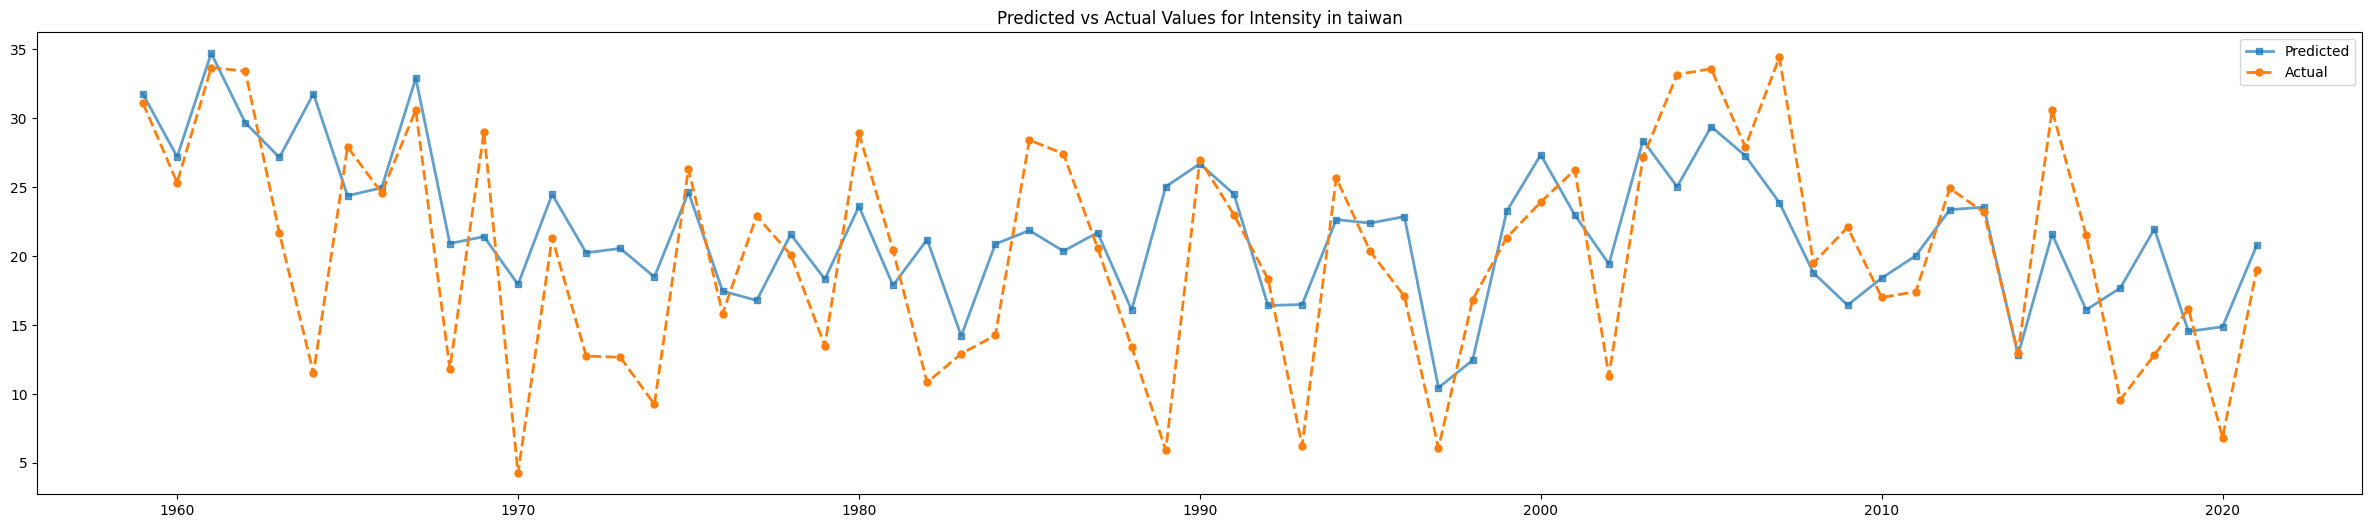

RMSE for y2: 4.656199342791156
Correlation for y2: 0.6696726310089869


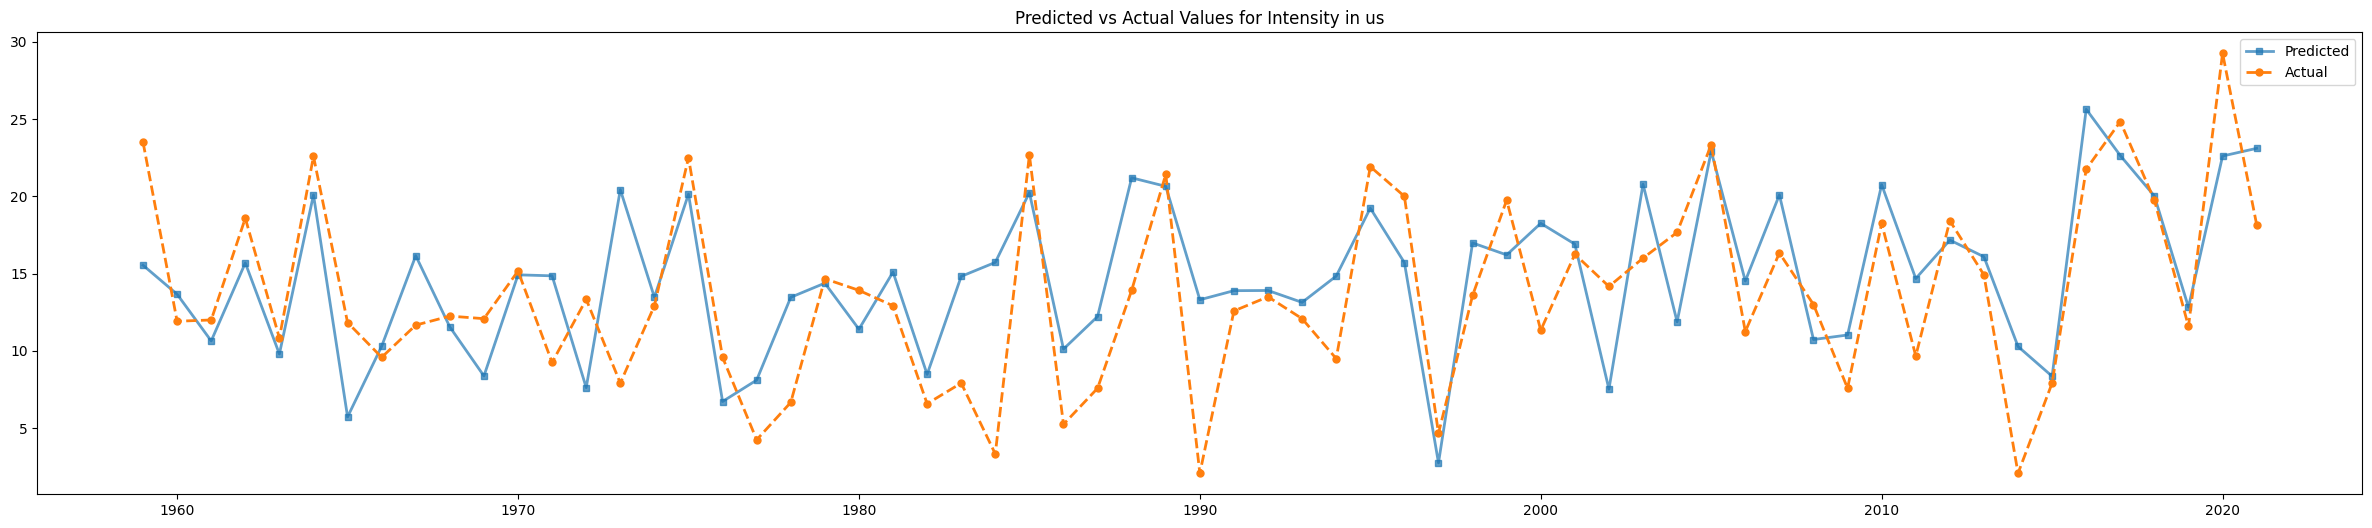

In [ ]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten_20230612.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'mean', 'y2_pred': 'mean'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()
